<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [50]:
crime = pd.read_csv('/content/drive/My Drive/chic.csv',
                        na_values = [None, 'NaN','Nothing'], header = 0) 


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
crime.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [0]:
crime.drop(['Case Number','IUCR','FBI Code','Location',
                 'X Coordinate','Y Coordinate'], inplace = True, axis = 1)


In [0]:
crime.index = pd.DatetimeIndex(crime.Date)


In [0]:
Groups = crime.groupby(crime['Primary Type'])
Groups = dict(list(Groups))

In [0]:
robCrimes_Data = [Groups['THEFT'], Groups['ROBBERY']]
robCrimes_Data = pd.concat(robCrimes_Data, axis = 0)
del Groups
del crime


In [0]:
Data = [robCrimes_Data]
Data = pd.concat(Data, axis = 1)

In [0]:
Data['Primary Type'] = pd.Categorical(Data['Primary Type'])
Data['Description'] = pd.Categorical(Data['Description'])
Data['Location Description'] = pd.Categorical(Data['Location Description'])

In [0]:
Data.drop(['ID','Date','Block', 'Updated On','Beat','District','Ward','Community Area'], inplace = True, axis = 1)
#Adding variables about the time that each crime was reported at
Data['Month'] = Data.index.month
Data['Hour'] = Data.index.hour
Data['Day'] = Data.index.day
Data['Minute'] = Data.index.minute
SC_Data = Data.groupby('Primary Type')

In [0]:
Data_By_Crime = [None] * 2
Data_By_Crime[0] = SC_Data.get_group('THEFT')
Data_By_Crime[1] = SC_Data.get_group('ROBBERY')


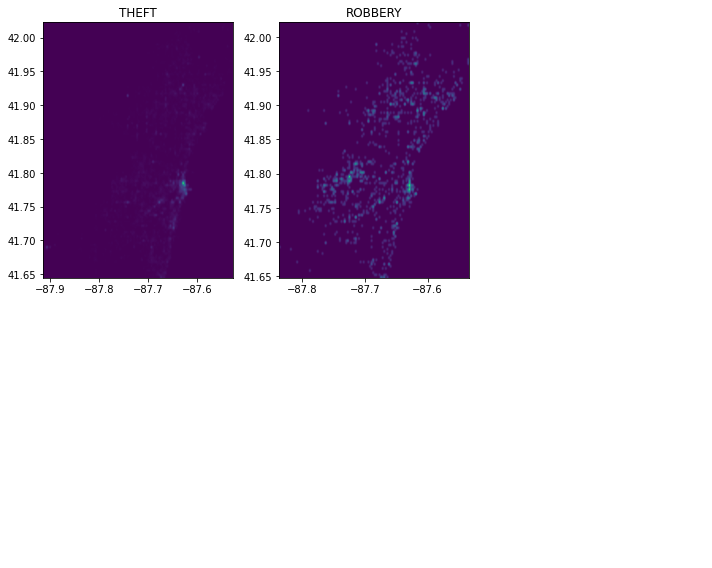

In [61]:
fig = plt.figure(figsize = (10,8))
d = dict(zip(range(6),Data['Primary Type'].unique()))
plt.axis('off')
for i in range(2):
    Data_By_Crime[i] = Data_By_Crime[i].dropna(how = 'any', axis = 0)
    x = Data_By_Crime[i]['Longitude']
    y = Data_By_Crime[i]['Latitude']
    a = fig.add_subplot(2,3,1+i)
    a.set_title('%s'%d[i])
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=120)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    a.imshow(heatmap.T, extent = extent, aspect = 'auto', interpolation = 'gaussian')
plt.tight_layout()
plt.show()


In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)

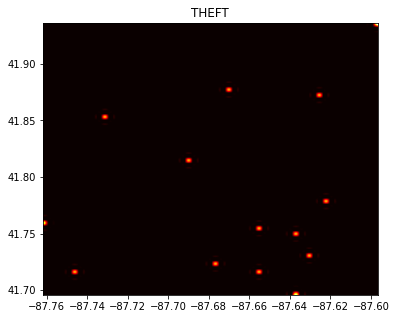

In [63]:
Year_Data = Data_By_Crime[0].groupby(['Year'])
YData = []
for j in range(2001,2019):
    for k in range(len(list(Year_Data))):
        if(j == list(Year_Data)[k][0]):
            YData.append(Year_Data.get_group(j))
fig = plt.figure(figsize = (6,5))
listyears = []
for k in range(len(list(Year_Data))):
    listyears.append(list(Year_Data)[k][0])
dyear = dict(zip(range(len(list(Year_Data))),listyears))
ims = []
for j in range(len(YData)):
    YData[j] = YData[j].dropna(how = 'any', axis = 0)
    x = YData[j]['Longitude']
    y = YData[j]['Latitude']
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = plt.imshow(heatmap.T, extent = extent, cmap = 'hot', aspect = 'auto', interpolation = 'bessel', animated = True)
    plt.title('%s'%d[0])
    ims.append([im])
anim = animation.ArtistAnimation(fig, ims, interval=1000, blit = True)
HTML(anim.to_html5_video())
anim.save('theft.mp4', writer=writer)
plt.show()

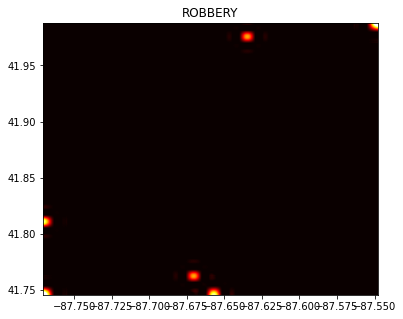

In [64]:
Year_Data = Data_By_Crime[1].groupby(['Year'])
YData = []
for j in range(2001,2019):
    for k in range(len(list(Year_Data))):
        if(j == list(Year_Data)[k][0]):
            YData.append(Year_Data.get_group(j))
fig = plt.figure(figsize = (6,5))
listyears = []
for k in range(len(list(Year_Data))):
    listyears.append(list(Year_Data)[k][0])
dyear = dict(zip(range(len(list(Year_Data))),listyears))
ims = []
for j in range(len(YData)):
    YData[j] = YData[j].dropna(how = 'any', axis = 0)
    x = YData[j]['Longitude']
    y = YData[j]['Latitude']
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = plt.imshow(heatmap.T, extent = extent, cmap = 'hot', aspect = 'auto', interpolation = 'bessel', animated = True)
    plt.title('%s'%d[1])
    ims.append([im])
anim = animation.ArtistAnimation(fig, ims, interval=1000, blit = True)
HTML(anim.to_html5_video())
anim.save('rob.mp4', writer=writer)
plt.show()


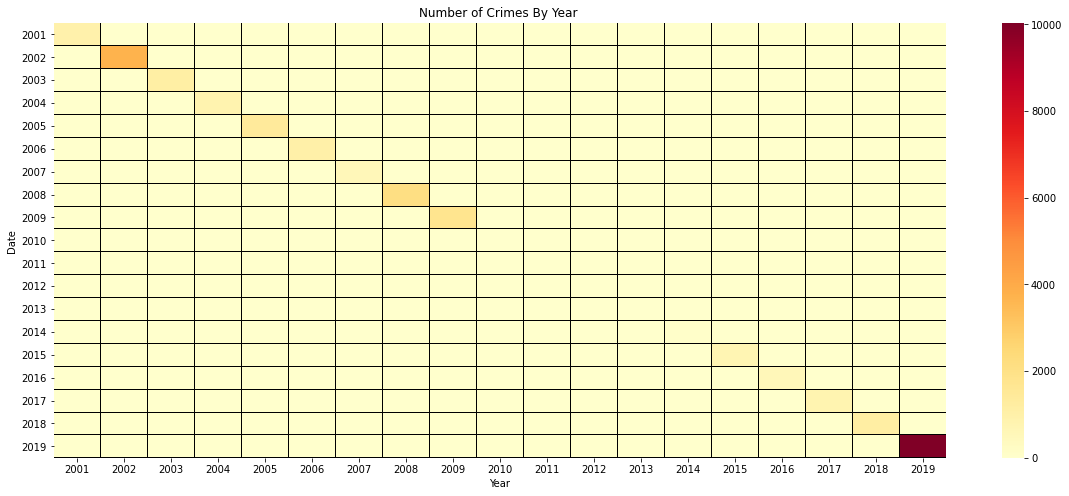

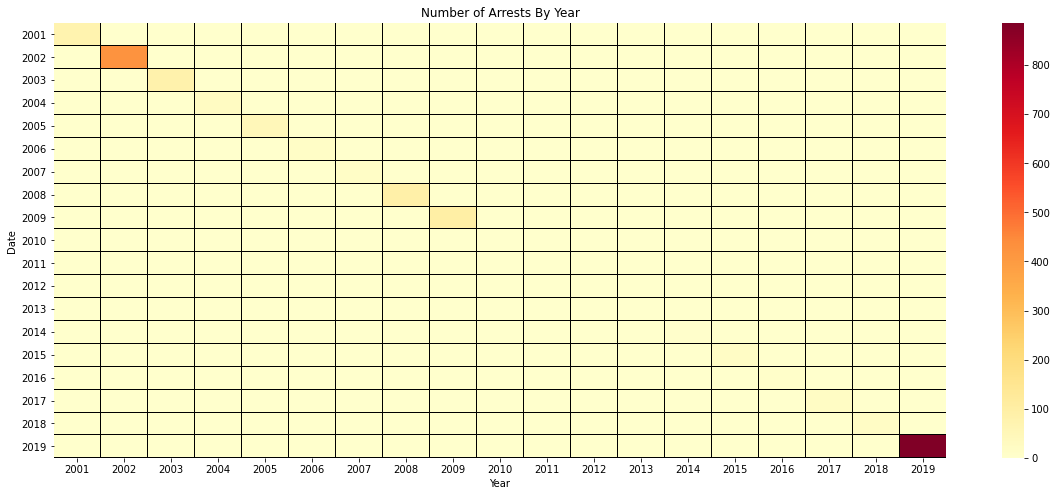

In [65]:
%matplotlib inline
#Creating heatmaps for visualizing crime by zip code
import seaborn as sns
#Graph of Number of Crimes per zipcode and crime by zipcodes
Crime_By_Zip = Data.pivot_table('Arrest', aggfunc = np.size, columns = 'Year',
                               index = Data.index.year, fill_value = 0)
plt.figure(figsize = (20,8))
plt.title('Number of Crimes By Year ')
hm = sns.heatmap(Crime_By_Zip, cmap = 'YlOrRd', linewidth = 0.01, linecolor = 'k')
#Graph of Number of Arrests per zipcode and crime by zipcodes
Arrests_By_Zip = Data.pivot_table('Arrest', aggfunc = np.sum, columns = 'Year',
                               index = Data.index.year, fill_value = 0)
plt.figure(figsize = (20,8))
plt.title('Number of Arrests By Year')
hm = sns.heatmap(Arrests_By_Zip, cmap = 'YlOrRd', linewidth = 0.01, linecolor = 'k')
plt.show()


In [0]:
Data['Primary Type'] = Data['Primary Type'].cat.codes
Data['Description'] = Data['Description'].cat.codes
Data['Location Description'] = Data['Location Description'].cat.codes


In [0]:
from sklearn import linear_model
#Importing PCA library
from sklearn.decomposition import PCA
pca = PCA()
reg = linear_model.LinearRegression()

In [68]:
Data = Data.dropna(axis = 0, how = 'any')
Y = Data['Arrest']
Data.drop(['Arrest'], inplace = True, axis = 1)
#Using PCA to optimize fit for each algorithm
pca.fit(Data[0:28])
PCAData = pca.fit_transform(Data)
X = PCAData
print(pca.explained_variance_ratio_)


[5.26348750e-01 2.79226403e-01 9.87542416e-02 6.27780984e-02
 3.18660442e-02 7.06000700e-04 1.99285623e-04 8.49660280e-05
 2.84260039e-05 6.08151296e-06 1.70282122e-06]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
#Splitting Data randomly 80-20 training-test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)

In [0]:
reg.fit(X_train,Y_train)
Reg_Expected_Y = reg.predict(X_test)
for i in range(len(Reg_Expected_Y)):
    if (Reg_Expected_Y[i] >= 0.5):
        Reg_Expected_Y[i] = True
    else:
        Reg_Expected_Y[i] = False


In [0]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score
cm = confusion_matrix(Y_test, Reg_Expected_Y)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    with sns.axes_style("white"):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Arrest')
    plt.xlabel('Predicted Arrest')


Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


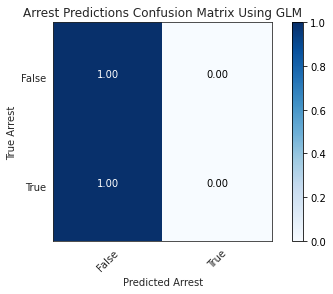

Accuracy of Model is: 0.893238


In [74]:
plt.figure()
plot_confusion_matrix(cm, normalize = True, classes = Y.unique(), title = 'Arrest Predictions Confusion Matrix Using GLM')
plt.show()
print("Accuracy of Model is: %f"%accuracy_score(Y_test, Reg_Expected_Y))


In [0]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

In [0]:
BNB.fit(X_train, Y_train)
BNB_Expected_Y = BNB.predict(X_test)


Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


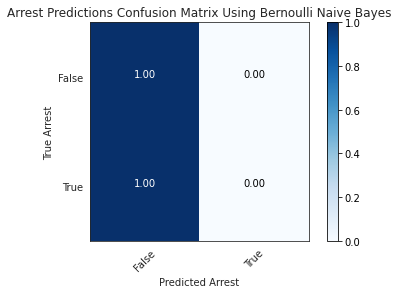

Accuracy of Model is: 0.893238


In [77]:
cm = confusion_matrix(Y_test, BNB_Expected_Y)
plt.figure()
plot_confusion_matrix(cm, normalize = True, classes = Y.unique(), 
                      title = 'Arrest Predictions Confusion Matrix Using Bernoulli Naive Bayes')
plt.show()
print("Accuracy of Model is: %f"%accuracy_score(Y_test, BNB_Expected_Y))


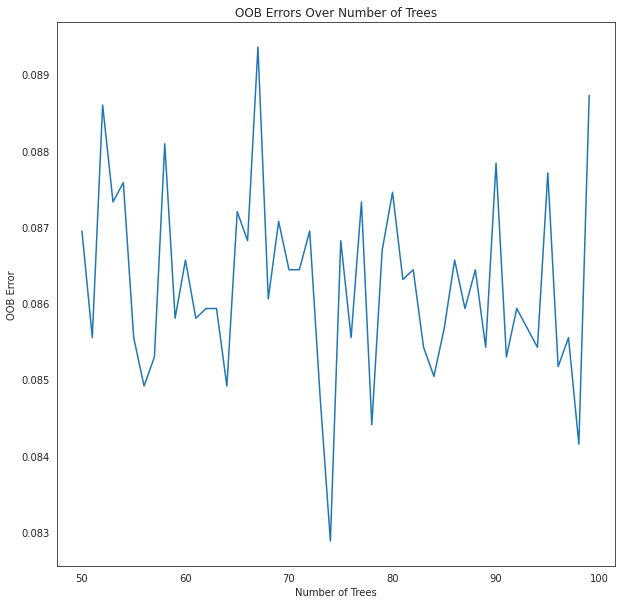

In [78]:
from sklearn.ensemble import RandomForestClassifier
#testing oob score of random forests with sizes between 50 to 100 trees
OOB_Err = list(range(50,100))
for i in range(50,100):
    rfc = RandomForestClassifier(n_estimators = i, oob_score = True, n_jobs = -1)
    rfc.fit(X_train,Y_train)
    OOB_Err[i-50] = 1 - rfc.oob_score_
#plotting OOB Scores
plt.figure(figsize = (10,10))
with sns.axes_style("white"):
    plt.plot(list(range(50,100)), OOB_Err)
plt.title('OOB Errors Over Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.show()


In [0]:
rforest = RandomForestClassifier(n_estimators = 90, n_jobs = -1)
rforest.fit(X_train, Y_train)
RF_Expected_Y = rforest.predict(X_test)

Normalized confusion matrix
[[0.98121799 0.01878201]
 [0.74761905 0.25238095]]


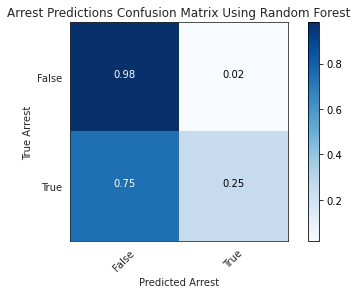

Accuracy of Model is: 0.903406


In [80]:
cm = confusion_matrix(Y_test, RF_Expected_Y)
plt.figure()
plot_confusion_matrix(cm, normalize = True, classes = Y.unique(), 
                      title = 'Arrest Predictions Confusion Matrix Using Random Forest')
plt.show()
print("Accuracy of Model is: %f"%accuracy_score(Y_test, RF_Expected_Y))


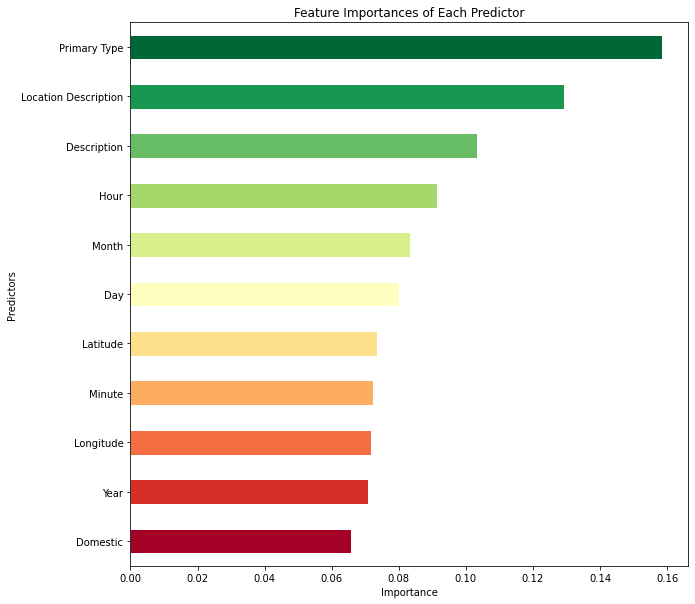

In [81]:
Col_Imp =[]
Col_Imp.append(list(Data.columns))
Col_Imp.append(list(rforest.feature_importances_))
Col_Imp = list(map(list, zip(*Col_Imp)))
Col_Imp = pd.DataFrame(Col_Imp, columns = ['Predictors','Feature Importances'])

#plot feature importance
Col_Imp.index = Col_Imp['Predictors']
colors = plt.cm.RdYlGn(np.linspace(0,1,len(Col_Imp)))
plt.title('Feature Importances of Each Predictor')
plt.xlabel('Importance')
with sns.axes_style("white"):
    Col_Imp['Feature Importances'].sort_values().plot(figsize = (10,10), kind = 'barh', color = colors)
plt.show()